In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

def plot_metrics(y_test, y_pred):
    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    labels = ["Fake (0)", "Real (1)"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # --- Precision, Recall, F1 ---
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])
    metric_names = ["Precision", "Recall", "F1-Score"]
    values_0 = [precision[0], recall[0], f1[0]]
    values_1 = [precision[1], recall[1], f1[1]]

    x = range(len(metric_names))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], values_0, width=width, label="Fake (0)")
    plt.bar([i + width/2 for i in x], values_1, width=width, label="Real (1)")
    plt.xticks(ticks=x, labels=metric_names)
    plt.ylim(0, 1.05)
    plt.ylabel("Score")
    plt.title("Precision, Recall, F1-score by Class")
    plt.legend()
    plt.tight_layout()
    plt.show()



In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


✅ Trained model saved as 'saved_model.joblib'
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7089
           1       0.95      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



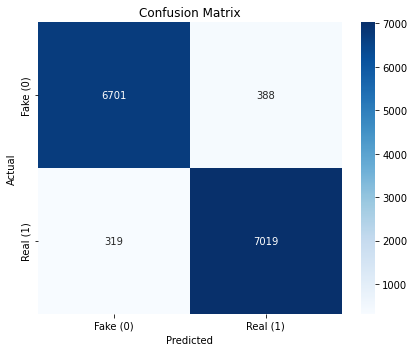

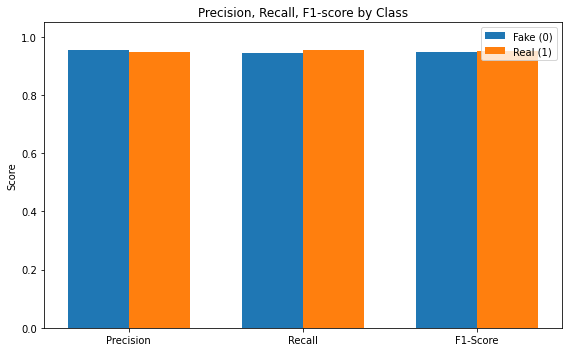

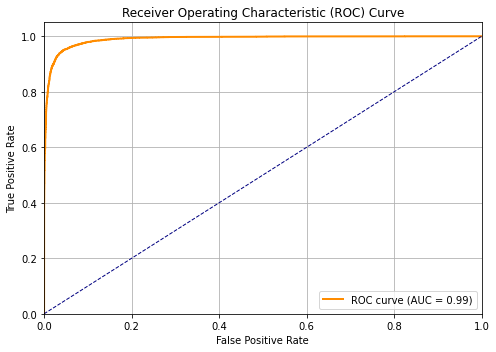


News Sample 1:
ARNOLD SCHWARZENEGGER Sends A Message To Liberals Whining About Trump [Video]   ...
Actual: Real
Predicted: Real
————————————————————————————————————————————————————————————

News Sample 2:
WOW! “We Mexicans Need To Kill Donald Trump Before He Becomes President…Cross The Border And Go And Kill Trump And His Supporters” [VIDEO] And now a message of peace and unity from one of our neighbors to the South:  We, Mexicans, have to kill Donald J. Trump before he becomes President. He is a thr ...
Actual: Real
Predicted: Real
————————————————————————————————————————————————————————————

News Sample 3:
Jimmy Carter recovers from dehydration scare in Canada WINNIPEG, Manitoba (Reuters) - Former U.S. President Jimmy Carter, appearing fully recovered from dehydration suffered while helping to build a home for charity in Canada, was released from an overnight hospital stay on Friday and addressed the  ...
Actual: Fake
Predicted: Fake
—————————————————————————————————————————————————

In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), "..")))

from dataloading import get_hasib18_fns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

import joblib

def run_logistic_regression():
    train_df, test_df = get_hasib18_fns(include_instruction=False)
    X_train, y_train = train_df["text"], train_df["label"]
    X_test, y_test = test_df["text"], test_df["label"]

    model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)

    # ✅ Save the trained model
    joblib.dump(model, "logistic_regression.joblib")
    print("✅ Trained model saved as 'saved_model.joblib'")

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_metrics(y_test, y_pred)

    # Get probability estimates for positive class (real news = 1)
    y_proba = model.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_proba)

if __name__ == "__main__":
    run_logistic_regression()



In [11]:
import joblib

# Load saved model
model = joblib.load("logistic_regression.joblib")
print("✅ Model loaded!")

# Sample test input
sample_news = [
    "New study shows climate change is slowing down.",
    "Aliens landed in Nevada and took over a pizza shop.",
    "The UN meets to discuss humanitarian aid for Gaza.",
    "Donald Trump is gay."
]

# Predict
preds = model.predict(sample_news)
probas = model.predict_proba(sample_news)[:, 1]

for text, pred, proba in zip(sample_news, preds, probas):
    print("NEWS:", text)
    print("Predicted:", "Real" if pred else "Fake", f"(Confidence: {proba:.2f})")
    print("—" * 60)


✅ Model loaded!
NEWS: New study shows climate change is slowing down.
Predicted: Real (Confidence: 0.89)
————————————————————————————————————————————————————————————
NEWS: Aliens landed in Nevada and took over a pizza shop.
Predicted: Real (Confidence: 0.80)
————————————————————————————————————————————————————————————
NEWS: The UN meets to discuss humanitarian aid for Gaza.
Predicted: Real (Confidence: 0.91)
————————————————————————————————————————————————————————————
NEWS: Donald Trump is gay.
Predicted: Real (Confidence: 0.91)
————————————————————————————————————————————————————————————
